# Fair Roulette

In [1]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.blackOdds, self.redOdds = 1.0, 1.0
        self.pocketOdds = len(self.pockets) - 1.0
    def spin(self):
        self.ball = random.choice(self.pockets)
    def isBlack(self):
        if type(self.ball) != int:
            return False
        if ((self.ball > 0 and self.ball <= 10) or (self.ball>18 and self.ball<=28)):
            return self.ball%2 == 0
        else:
            return self.ball%2 == 1
    def isRed(self):
        return type(self.ball) == int and not self.isBlack()
    def betBlack(self, amt):
        if self.isBlack():
            return amt*self.blackOdds
        else: return -amt
    def betRed(self, amt):
        if self.isRed():
            return amt*self.redOdds
        else: return -amt*self.redOdds
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

# Play Roulette

In [3]:
def playRoulette(game, numSpins, toPrint = True):
    luckyNumber = '2'
    bet = 1
    totRed, totBlack, totPocket = 0.0, 0.0, 0.0
    for i in range(numSpins):
        game.spin()
        totRed += game.betRed(bet)
        totBlack += game.betBlack(bet)
        totPocket += game.betPocket(luckyNumber, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting red =', str(100*totRed/numSpins) + '%')
        print('Expected return betting black =', str(100*totBlack/numSpins) + '%')
        print('Expected return betting', luckyNumber, '=',\
             str(100*totPocket/numSpins)+ '%\n')
    return (totRed/numSpins, totBlack/numSpins, totPocket/numSpins)

# European Roulette

In [4]:
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

# American Roulette

In [5]:
class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'

# Packet Return

In [6]:
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, toPrint)
        pocketReturns.append(trialVals[2])
    return pocketReturns

# Run the Simulation

In [19]:
import random
random.seed(0)
numTrials = 20
games = (FairRoulette, EuRoulette, AmRoulette)
for numSpins in (100, 1000, 10000, 100000):
    print('\nSimulate betting a pocket for', numTrials, 'trials of', \
         numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials, numSpins, False)
        
        print('Exp. return for', G(), '=', \
              str(round(100*sum(pocketReturns)/float(len(pocketReturns)),1)) + '%')


Simulate betting a pocket for 20 trials of 100 spins each
Exp. return for Fair Roulette = 6.2%
Exp. return for European Roulette = -8.2%
Exp. return for American Roulette = 2.6%

Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Roulette = 4.8%
Exp. return for European Roulette = -2.4%
Exp. return for American Roulette = -9.5%

Simulate betting a pocket for 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.3%
Exp. return for European Roulette = -4.1%
Exp. return for American Roulette = -5.7%

Simulate betting a pocket for 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.8%
Exp. return for European Roulette = -2.6%
Exp. return for American Roulette = -5.1%


# Quantifying Variation in data

In [20]:
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

# Applying Empirical Rule

In [21]:
numTrials = 20
games = (FairRoulette, EuRoulette, AmRoulette)
for numSpins in (1000, 100000, 1000000):
    print('\nSimulate betting a pocket for', numTrials, 'trials of', numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), 20, numSpins, False)
        mean, std = getMeanAndStd(pocketReturns)
        print('Exp. return for', G(), '=', str(round(100*mean, 3))
              + '%,', '+/-' + str(round(100*1.96*std, 3)) + '% with 95% confidence')


Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Roulette = -0.28%, +/-28.67% with 95% confidence
Exp. return for European Roulette = -4.6%, +/-31.83% with 95% confidence
Exp. return for American Roulette = -5.68%, +/-37.243% with 95% confidence

Simulate betting a pocket for 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.195%, +/-3.907% with 95% confidence
Exp. return for European Roulette = -2.559%, +/-4.244% with 95% confidence
Exp. return for American Roulette = -4.967%, +/-3.549% with 95% confidence

Simulate betting a pocket for 20 trials of 1000000 spins each
Exp. return for Fair Roulette = -0.141%, +/-0.932% with 95% confidence
Exp. return for European Roulette = -2.679%, +/-1.176% with 95% confidence
Exp. return for American Roulette = -5.395%, +/-0.866% with 95% confidence


# Generating Normal Distribution

In [7]:
import random 
import pylab

(array([1.0000e+00, 5.0000e+00, 7.0000e+00, 3.3000e+01, 7.2000e+01,
        2.1900e+02, 4.4200e+02, 8.6000e+02, 1.6850e+03, 2.8740e+03,
        4.4970e+03, 6.4450e+03, 8.6180e+03, 1.0336e+04, 1.1562e+04,
        1.1725e+04, 1.1049e+04, 9.3770e+03, 7.2610e+03, 5.2050e+03,
        3.5350e+03, 1.9640e+03, 1.1500e+03, 6.3500e+02, 2.6600e+02,
        1.0500e+02, 4.6000e+01, 1.7000e+01, 7.0000e+00, 2.0000e+00]),
 array([-135.13307028, -126.24675243, -117.36043458, -108.47411673,
         -99.58779888,  -90.70148103,  -81.81516318,  -72.92884533,
         -64.04252748,  -55.15620963,  -46.26989178,  -37.38357393,
         -28.49725608,  -19.61093823,  -10.72462038,   -1.83830253,
           7.04801532,   15.93433317,   24.82065102,   33.70696887,
          42.59328672,   51.47960457,   60.36592242,   69.25224027,
          78.13855812,   87.02487597,   95.91119382,  104.79751168,
         113.68382953,  122.57014738,  131.45646523]),
 <a list of 30 Patch objects>)

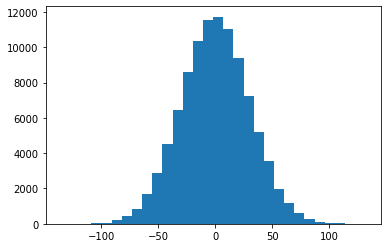

In [8]:
dist = []
for i in range(100000):
    dist.append(random.gauss(0, 30))
pylab.hist(dist, 30)

# Checking Empirical Rule

In [22]:
import scipy.integrate

def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu=', mu, 'and sigma =', sigma)
        for numStd in (1, 1.96, 3):
            area = scipy.integrate.quad(gaussian, mu-numStd*sigma, mu+numStd*sigma, (mu, sigma))[0]
            print('Fraction within', numStd, 'std =', round(area, 4))